# Initial condition dependence multiplicative noise

In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt

In [2]:
load = mat73.loadmat("./exp-6.mat")
results = load['results']

In [3]:
nn = 20
num_init = 100

numB = np.zeros((num_init,nn+1))
for ii in range(num_init):
    for ni in range(nn+1):
        nidx = np.arange(2**ni+1) * 2**(nn-ni)
        nresult = results[nidx,ii]
        numB[ii,ni] = np.sum((nresult[:-1] != nresult[1:]).astype(float))

In [4]:
fracdims = np.zeros(num_init)

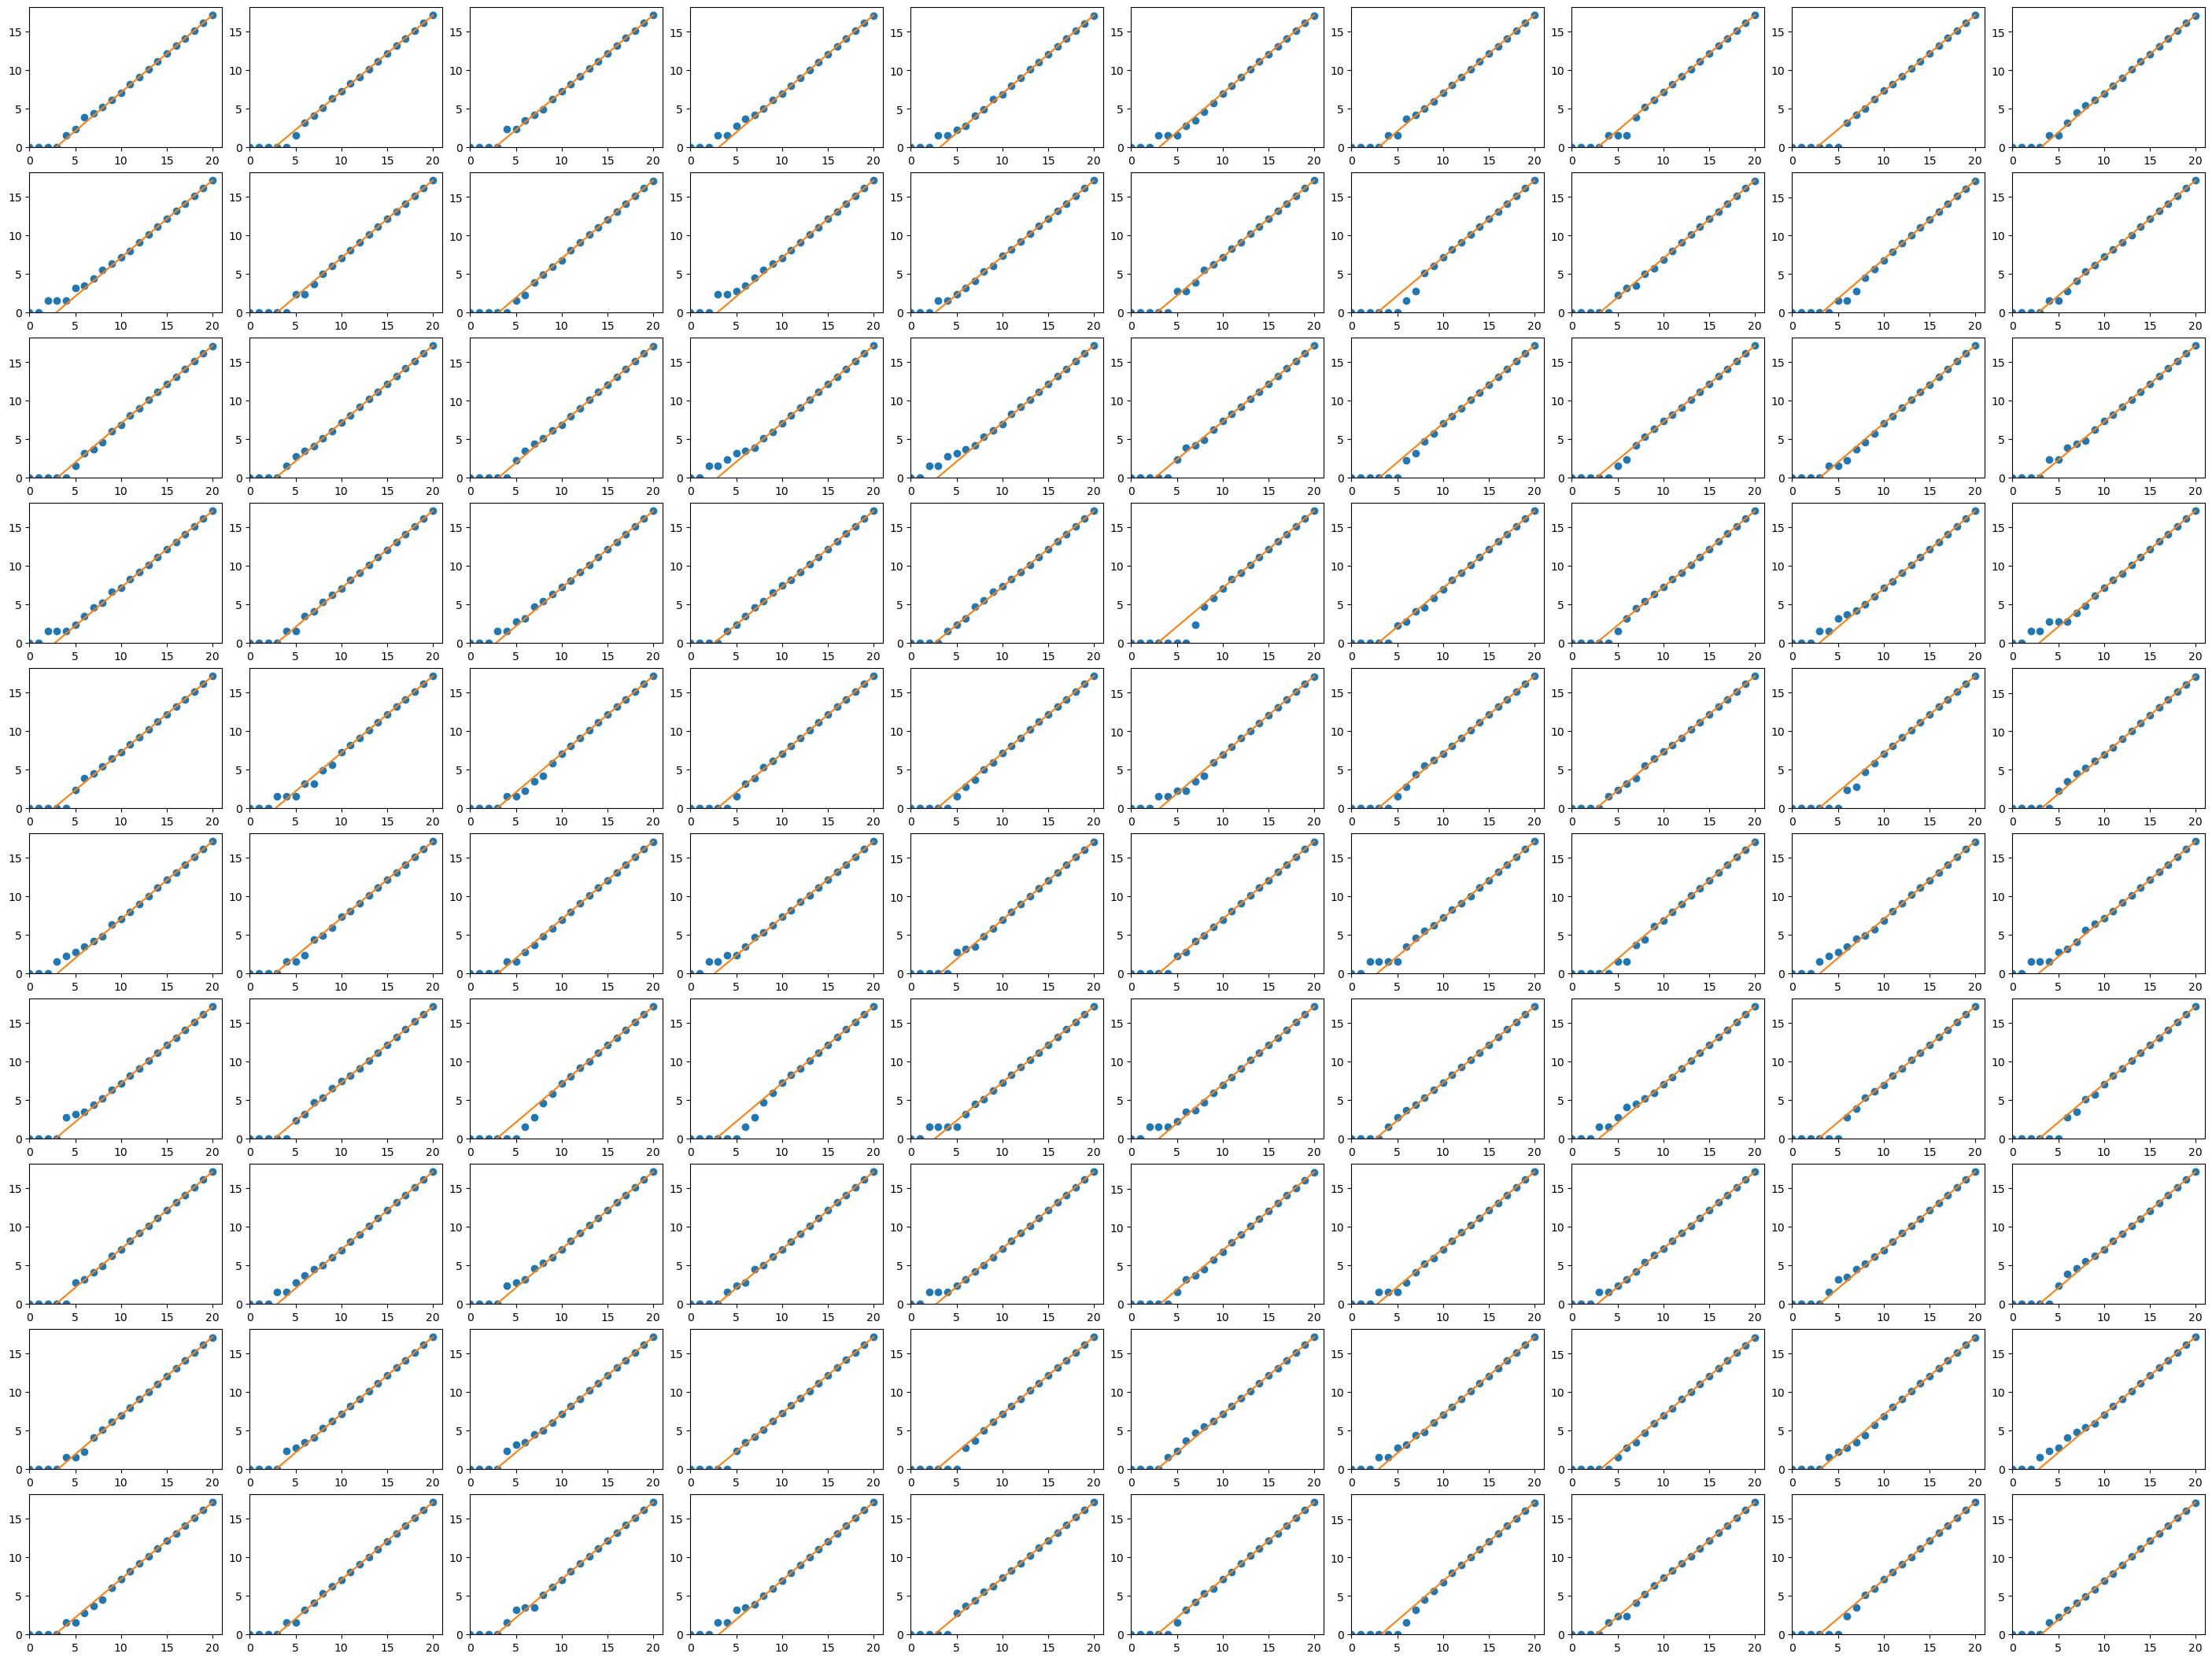

In [5]:
fig, axs = plt.subplots(10,10, figsize=(28, 21), constrained_layout=True)
for i in range(10):
    for j in range(10):
        axs[i, j].plot(np.arange(nn+1), np.log2(numB[i*10+j]),'o')
        slope, cut = np.linalg.lstsq(np.vstack([np.arange(10,nn+1), np.ones(nn+1-10)]).T , np.log2(numB[i*10+j,10:]), rcond=None)[0]
        fracdims[i*10+j] = slope
        axs[i, j].plot(np.arange(nn+1), slope * np.arange(nn+1) + cut)
        axs[i, j].set_ylim(0,)
        axs[i, j].set_xlim(0,)
        #axs[i, j].set_title('pH of Comm. '+str(ii+1))
plt.savefig('./figures/exp-6SI.pdf')

In [6]:
np.mean(fracdims)

1.000357966832003

In [7]:
np.std(fracdims)

0.01114281217999579